In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
# Define image size and directories
IMAGE_SIZE = [224, 224]  # VGG16 uses 224x224 input size
train_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\train"
test_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\test"
val_directory = r"C:\Users\castr\OneDrive\Desktop\img.class\melon_dataset\val"

In [3]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load training and testing sets with data augmentation
training_set = train_datagen.flow_from_directory(
    train_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 1920 images belonging to 10 classes.
Found 880 images belonging to 10 classes.


In [6]:
# Add preprocessing layer to the front of VGG16
vgg16 = VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

In [9]:
# Freeze the layers
for layer in vgg16.layers:
    layer.trainable = False

# Global Average Pooling
x = GlobalAveragePooling2D()(vgg16.output)

# Fully Connected Layer
x = Dense(128, activation='relu')(x)

# Output Layer
output_tensor = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=vgg16.input, outputs=output_tensor)


In [10]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [12]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10
60/60 [==============================] - 308s 5s/step - loss: 1.7865 - accuracy: 0.4464 - val_loss: 1.4263 - val_accuracy: 0.5693
Epoch 2/10
60/60 [==============================] - 290s 5s/step - loss: 1.3136 - accuracy: 0.6109 - val_loss: 1.0965 - val_accuracy: 0.6614
Epoch 3/10
60/60 [==============================] - 276s 5s/step - loss: 1.0871 - accuracy: 0.6745 - val_loss: 0.8997 - val_accuracy: 0.7193
Epoch 4/10
60/60 [==============================] - 270s 5s/step - loss: 0.9435 - accuracy: 0.7203 - val_loss: 0.7671 - val_accuracy: 0.7886
Epoch 5/10
60/60 [==============================] - 269s 5s/step - loss: 0.8344 - accuracy: 0.7635 - val_loss: 0.7009 - val_accuracy: 0.7955
Epoch 6/10
60/60 [==============================] - 276s 5s/step - loss: 0.7636 - accuracy: 0.7776 - val_loss: 0.6473 - val_accuracy: 0.8000
Epoch 7/10
60/60 [==============================] - 285s 5s/step - loss: 0.7059 - accuracy: 0.7891 - val_loss: 0.5818 - val_accuracy: 0.8398
Epoch 8/10
60

In [13]:
# Save the model
model.save('melon_species_vgg16.h5')

C:\Users\castr\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


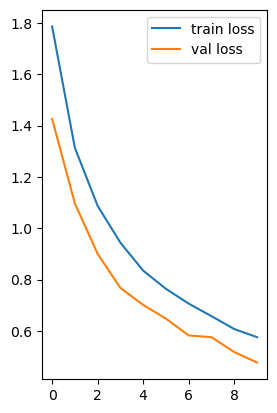

In [15]:
import matplotlib.pyplot as plt

# Plot loss and accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

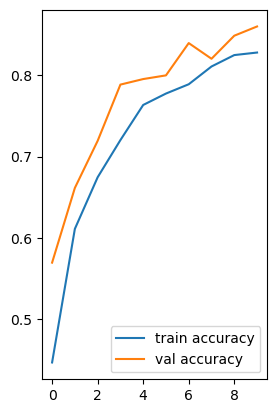

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()